In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download required NLTK data
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
# Load dataset
file_path = "airline_reviews.csv"  # Change to actual file path
df = pd.read_csv(file_path)

<ipython-input-3-7aa16d6d2b8b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


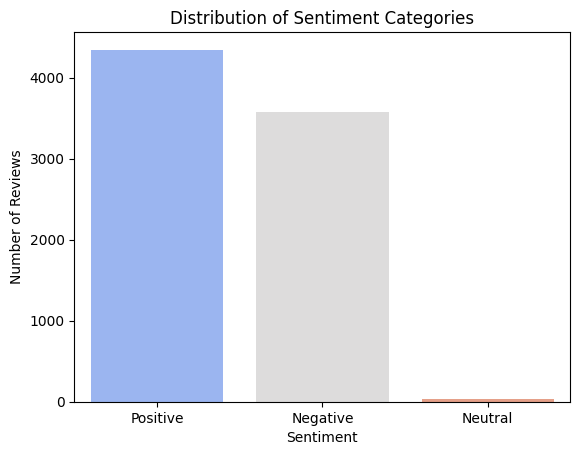

In [3]:
# Clean the text
df["Review Text"] = df["Review Text"].astype(str).str.replace("[^a-zA-Z0-9 ]", "", regex=True)

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
df["Sentiment"] = df["Review Text"].apply(lambda x: sia.polarity_scores(x)['compound'])
df["Sentiment Category"] = df["Sentiment"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

# Display sentiment distribution
sentiment_counts = df["Sentiment Category"].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Distribution of Sentiment Categories")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

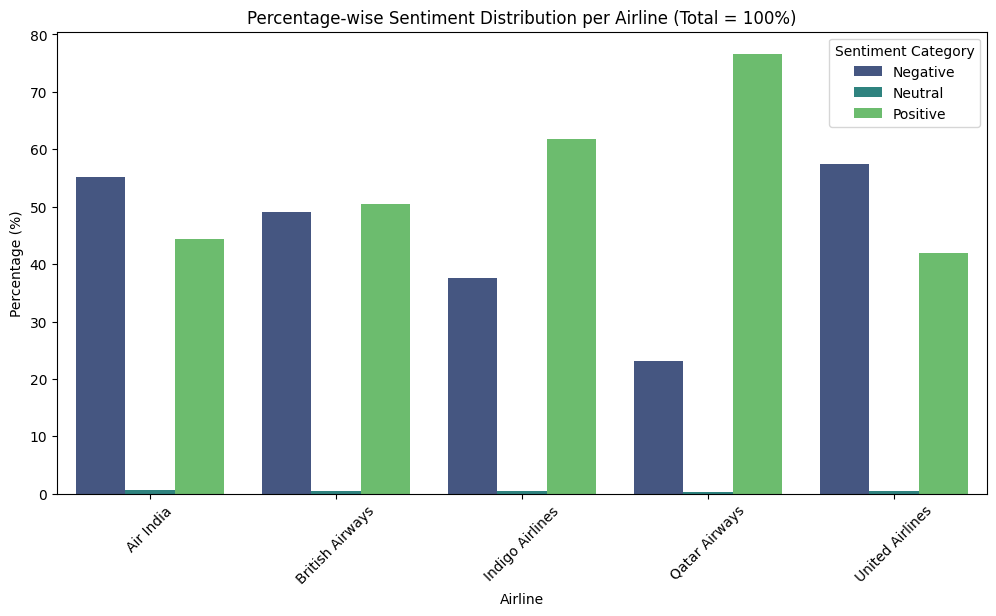

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate sentiment percentage for each airline
sentiment_counts = df.groupby(["Airline", "Sentiment Category"]).size().unstack()
sentiment_percentage = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

# Convert to long format for easier plotting
df_percentage = sentiment_percentage.reset_index().melt(id_vars="Airline", var_name="Sentiment Category", value_name="Percentage")

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_percentage, x="Airline", y="Percentage", hue="Sentiment Category", palette="viridis")

plt.xticks(rotation=45)
plt.title("Percentage-wise Sentiment Distribution per Airline (Total = 100%)")
plt.ylabel("Percentage (%)")
plt.xlabel("Airline")
plt.legend(title="Sentiment Category")

plt.show()


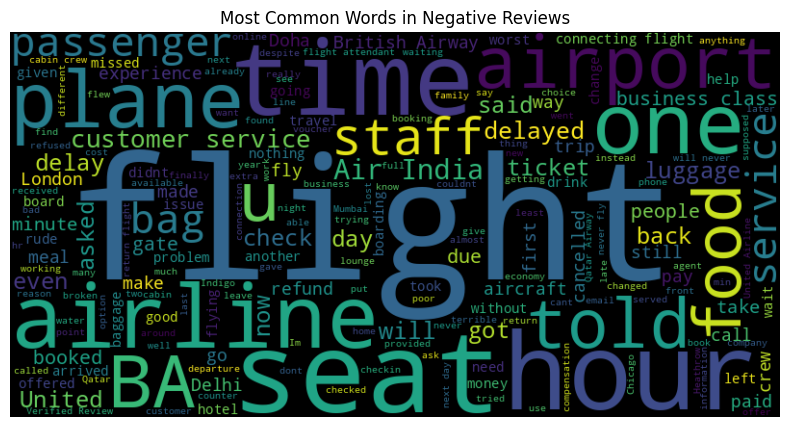

In [ ]:
# Generate a word cloud for negative reviews
negative_reviews = " ".join(df[df["Sentiment Category"] == "Negative"]["Review Text"])
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Negative Reviews")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Topic 1:
flight air india seat delhi time airline staff crew food


Topic 2:
flight seat airline service ba customer airway ticket class business


Topic 3:
flight seat food service good crew doha cabin class qatar


Topic 4:
flight hour united airline time airport day told customer delayed


Topic 5:
bag check boarding flight gate staff luggage minute lounge time




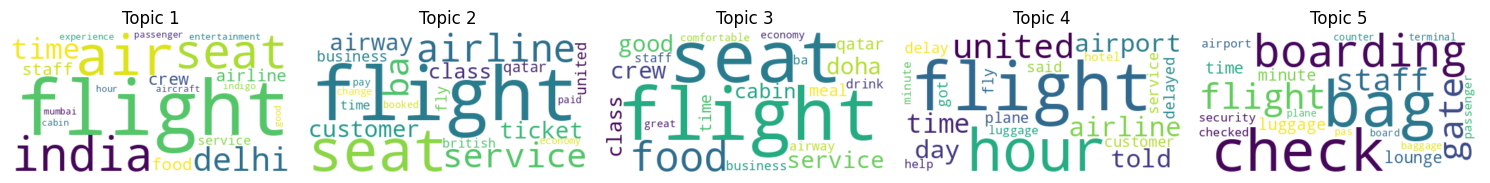

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

# Download necessary NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
# Download the 'punkt_tab' data package
nltk.download('punkt_tab') # This line was missing and is causing the error

# Load dataset
file_path = "airline_reviews.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Data Cleaning and Preprocessing
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Tokenizes, removes stopwords, and lemmatizes text."""
    tokens = word_tokenize(str(text).lower())  # Tokenize and convert to lowercase
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

df["Cleaned Review"] = df["Review Text"].apply(preprocess_text)

# Topic Modeling using LDA
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words="english")
dtm = vectorizer.fit_transform(df["Cleaned Review"])

# Define the LDA model
num_topics = 5  # Adjust based on dataset size
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Display topics with top words
def display_topics(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))
        print("\n")

# Extract and display topics
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names)

# Visualizing topics with word clouds
fig, axes = plt.subplots(1, num_topics, figsize=(15, 5))
for i, topic in enumerate(lda.components_):
    wordcloud = WordCloud(background_color="white").generate(" ".join([feature_names[j] for j in topic.argsort()[:-20 - 1:-1]]))
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Topic {i + 1}")

plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-16-119b4f90c44c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Emotion", palette="coolwarm")


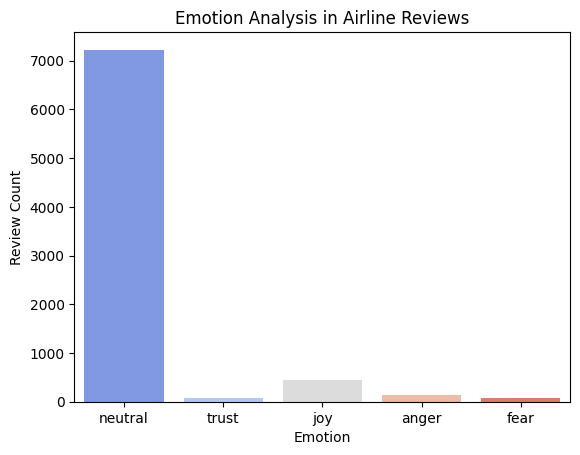

Emotion
neutral    7227
joy         452
anger       132
trust        77
fear         74
Name: count, dtype: int64


In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
import nltk
nltk.download('stopwords')

# Define emotions dictionary
emotion_words = {
    "anger": ["angry", "frustrated", "outrageous", "furious"],
    "joy": ["happy", "delightful", "pleased", "satisfied", "enjoyed"],
    "fear": ["scared", "nervous", "worried", "afraid"],
    "trust": ["trust", "dependable", "reliable"],
}

# Function to categorize emotions in reviews
def detect_emotion(text):
    words = text.split()
    for emotion, keywords in emotion_words.items():
        if any(word in words for word in keywords):
            return emotion
    return "neutral"

df["Emotion"] = df["Review Text"].apply(detect_emotion)

# Plot distribution of emotions
sns.countplot(data=df, x="Emotion", palette="coolwarm")
plt.title("Emotion Analysis in Airline Reviews")
plt.xlabel("Emotion")
plt.ylabel("Review Count")
plt.show()
print(df["Emotion"].value_counts())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Feature Engineering
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df["Review Text"])

# Example heuristic labels (1 = fake, 0 = real) - Needs manual labeling for training
df["Fake Label"] = df["Review Text"].apply(lambda x: 1 if "great service" in x.lower() and len(x.split()) < 5 else 0)

# Train classifier
model = RandomForestClassifier()
model.fit(X, df["Fake Label"])

# Predict fake reviews
df["Fake Review"] = model.predict(X)

# Display suspected fake reviews
print(df[df["Fake Review"] == 1][["Airline", "Review Text"]])


Empty DataFrame
Columns: [Airline, Review Text]
Index: []


In [ ]:
from collections import Counter
from wordcloud import WordCloud

def get_top_words(df, airline, sentiment):
    """Extracts top words for a given airline and sentiment category."""
    reviews = df[(df["Airline"] == airline) & (df["Sentiment Category"] == sentiment)]["Cleaned Review"]
    word_list = " ".join(reviews).split()
    return Counter(word_list).most_common(10)

airlines = df["Airline"].unique()
for airline in airlines:
    print(f"Airline: {airline}")
    print("Top Praise Words:", get_top_words(df, airline, "Positive"))
    print("Top Complaint Words:", get_top_words(df, airline, "Negative"))
    print("\n")


Airline: British Airways
Top Praise Words: [('flight', 2150), ('ba', 1325), ('seat', 1092), ('service', 847), ('crew', 750), ('good', 725), ('time', 718), ('food', 685), ('london', 657), ('cabin', 595)]
Top Complaint Words: [('flight', 2323), ('ba', 1396), ('seat', 920), ('service', 810), ('hour', 684), ('london', 665), ('airline', 601), ('time', 562), ('british', 546), ('airway', 535)]


Airline: Air India
Top Praise Words: [('flight', 1349), ('air', 653), ('india', 652), ('time', 548), ('good', 497), ('seat', 473), ('delhi', 450), ('food', 390), ('crew', 381), ('service', 378)]
Top Complaint Words: [('flight', 1862), ('india', 1031), ('air', 1025), ('delhi', 636), ('hour', 628), ('seat', 606), ('time', 556), ('airline', 521), ('staff', 461), ('service', 452)]


Airline: Indigo Airlines
Top Praise Words: [('flight', 532), ('indigo', 346), ('time', 304), ('airline', 204), ('seat', 202), ('crew', 194), ('staff', 167), ('service', 153), ('good', 138), ('cabin', 138)]
Top Complaint Words:

<ipython-input-19-ce34c45c4dc0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Sentiment Category"], y=df["Review Length"], palette="Set2")


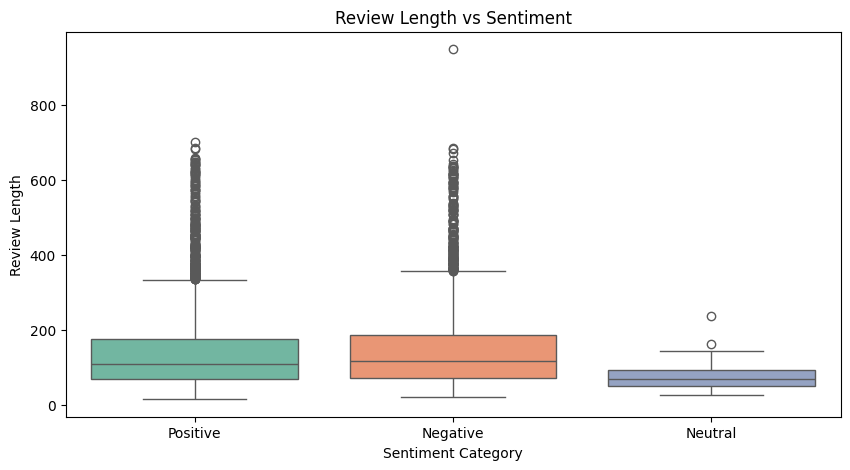

In [ ]:
df["Review Length"] = df["Review Text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Sentiment Category"], y=df["Review Length"], palette="Set2")
plt.title("Review Length vs Sentiment")
plt.show()

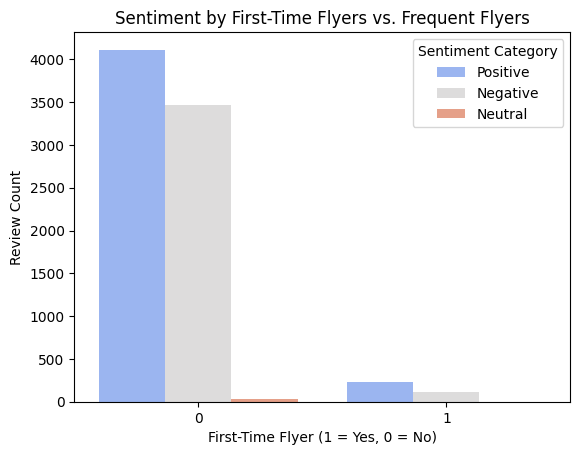

In [ ]:
df["First Time Flyer"] = df["Review Text"].apply(lambda x: 1 if "first time" in x.lower() else 0)

sns.countplot(data=df, x="First Time Flyer", hue="Sentiment Category", palette="coolwarm")
plt.title("Sentiment by First-Time Flyers vs. Frequent Flyers")
plt.xlabel("First-Time Flyer (1 = Yes, 0 = No)")
plt.ylabel("Review Count")
plt.show()


In [ ]:
import pandas as pd
import spacy
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import csv

# Load spaCy's English NER model
nlp = spacy.load("en_core_web_sm")

# Initialize Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Load dataset
file_path = "airline_reviews.csv"  # Change to actual file path
df = pd.read_csv(file_path)

# Function to extract named entities (People, Locations, Organizations)
def extract_entities(text):
    doc = nlp(str(text))
    staff = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    locations = [ent.text for ent in doc.ents if ent.label_ in ["GPE", "LOC"]]
    organizations = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    return staff, locations, organizations

# Store extracted entities
staff_list = []
location_list = []
organization_list = []

for review in df["Review Text"]:
    staff, locations, orgs = extract_entities(review)
    staff_list.extend(staff)
    location_list.extend(locations)
    organization_list.extend(orgs)

# Count most frequently mentioned entities
frequent_staff = Counter(staff_list).most_common(10)
frequent_locations = Counter(location_list).most_common(10)
common_entities = Counter(organization_list).most_common(10)

# Function to analyze sentiment for an entity
def analyze_entity_sentiment(entity, reviews):
    entity_reviews = reviews[reviews["Review Text"].str.contains(entity, case=False, na=False)]
    entity_reviews["Sentiment"] = entity_reviews["Review Text"].apply(lambda x: sia.polarity_scores(str(x))["compound"])
    avg_sentiment = entity_reviews["Sentiment"].mean()
    return avg_sentiment

# Calculate sentiment scores for top-mentioned entities
entity_sentiments = []
for entity, _ in common_entities:
    sentiment_score = analyze_entity_sentiment(entity, df)
    sentiment_label = "Positive" if sentiment_score > 0 else "Negative" if sentiment_score < 0 else "Neutral"
    entity_sentiments.append((entity, sentiment_score, sentiment_label))

# Calculate average sentiment per airline
df["Sentiment"] = df["Review Text"].apply(lambda x: sia.polarity_scores(str(x))["compound"])
airline_sentiment = df.groupby("Airline")["Sentiment"].mean().reset_index()

# Save all data to CSV
output_data = {
    "Frequent Staff": [s[0] for s in frequent_staff],
    "Frequent Locations": [l[0] for l in frequent_locations],
    "Common Entities": [e[0] for e in common_entities],
    "Entity Sentiment Score": [e[1] for e in entity_sentiments],
    "Entity Sentiment Label": [e[2] for e in entity_sentiments]
}

df_output = pd.DataFrame(output_data)
df_output.to_csv("airline_review_insights.csv", index=False)

# Save average sentiment per airline to CSV
airline_sentiment.to_csv("airline_average_sentiment.csv", index=False)

print("✅ Data saved successfully: 'airline_review_insights.csv' & 'airline_average_sentiment.csv'")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-21-796297152201>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entity_reviews["Sentiment"] = entity_reviews["Review Text"].apply(lambda x: sia.polarity_scores(str(x))["compound"])
<ipython-input-21-796297152201>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entity_reviews["Sentiment"] = entity_reviews["Review Text"].apply(lambda x: sia.polarity_scores(str(x))[

✅ Data saved successfully: 'airline_review_insights.csv' & 'airline_average_sentiment.csv'


In [ ]:
import pandas as pd
import spacy
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import defaultdict, Counter

# Load spaCy's English NER model
nlp = spacy.load("en_core_web_sm")

# Initialize Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Load dataset
file_path = "airline_reviews.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Function to extract staff names (PERSON entities)
def extract_staff(text):
    doc = nlp(str(text))
    return [ent.text for ent in doc.ents if ent.label_ == "PERSON"]

# Dictionary to store results: {Airline: {Staff Name: {Positive Mentions, Negative Mentions, Total Mentions, Avg Sentiment}}}
staff_data = defaultdict(lambda: defaultdict(lambda: {"Positive": 0, "Negative": 0, "Total": 0, "Avg Sentiment": 0}))

# Process each review
for _, row in df.iterrows():
    airline = row["Airline"]
    review = str(row["Review Text"])
    sentiment_score = sia.polarity_scores(review)["compound"]

    # Determine sentiment category
    sentiment_category = "Positive" if sentiment_score > 0 else "Negative" if sentiment_score < 0 else "Neutral"

    # Extract staff names
    staff_list = extract_staff(review)

    for staff in staff_list:
        staff_data[airline][staff]["Total"] += 1
        if sentiment_category == "Positive":
            staff_data[airline][staff]["Positive"] += 1
        elif sentiment_category == "Negative":
            staff_data[airline][staff]["Negative"] += 1

        # Update cumulative sentiment for averaging
        staff_data[airline][staff]["Avg Sentiment"] += sentiment_score

# Convert data to a structured format for saving
data_records = []
for airline, staff_dict in staff_data.items():
    for staff, stats in staff_dict.items():
        # Compute average sentiment
        avg_sentiment = stats["Avg Sentiment"] / stats["Total"] if stats["Total"] > 0 else 0
        data_records.append([airline, staff, stats["Positive"], stats["Negative"], stats["Total"], avg_sentiment])

# Convert to DataFrame
df_output = pd.DataFrame(data_records, columns=["Airline", "Staff", "Positive Mentions", "Negative Mentions", "Total Mentions", "Average Sentiment"])

# Save to CSV
df_output.to_csv("airline_staff_mentions.csv", index=False)

print("✅ Data saved successfully: 'airline_staff_mentions.csv'")


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ Data saved successfully: 'airline_staff_mentions.csv'


In [ ]:
import pandas as pd
import spacy
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import defaultdict, Counter

# Load spaCy's English NER model
nlp = spacy.load("en_core_web_sm")

# Initialize Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Load dataset
file_path = "airline_reviews.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Function to extract locations (GPE, LOC entities)
def extract_locations(text):
    doc = nlp(str(text))
    return [ent.text for ent in doc.ents if ent.label_ in ["GPE", "LOC"]]

# Dictionary to store results: {Airline: {Location: {Positive Mentions, Negative Mentions, Total Mentions, Avg Sentiment}}}
location_data = defaultdict(lambda: defaultdict(lambda: {"Positive": 0, "Negative": 0, "Total": 0, "Avg Sentiment": 0}))

# Process each review
for _, row in df.iterrows():
    airline = row["Airline"]
    review = str(row["Review Text"])
    sentiment_score = sia.polarity_scores(review)["compound"]

    # Determine sentiment category
    sentiment_category = "Positive" if sentiment_score > 0 else "Negative" if sentiment_score < 0 else "Neutral"

    # Extract locations
    location_list = extract_locations(review)

    for location in location_list:
        location_data[airline][location]["Total"] += 1
        if sentiment_category == "Positive":
            location_data[airline][location]["Positive"] += 1
        elif sentiment_category == "Negative":
            location_data[airline][location]["Negative"] += 1

        # Update cumulative sentiment for averaging
        location_data[airline][location]["Avg Sentiment"] += sentiment_score

# Convert data to a structured format for saving
data_records = []
for airline, location_dict in location_data.items():
    for location, stats in location_dict.items():
        # Compute average sentiment
        avg_sentiment = stats["Avg Sentiment"] / stats["Total"] if stats["Total"] > 0 else 0
        data_records.append([airline, location, stats["Positive"], stats["Negative"], stats["Total"], avg_sentiment])

# Convert to DataFrame
df_output = pd.DataFrame(data_records, columns=["Airline", "Location", "Positive Mentions", "Negative Mentions", "Total Mentions", "Average Sentiment"])

# Save to CSV
df_output.to_csv("airline_location_mentions.csv", index=False)

print("✅ Data saved successfully: 'airline_location_mentions.csv'")


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ Data saved successfully: 'airline_location_mentions.csv'


In [ ]:
import pandas as pd
import spacy
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import defaultdict, Counter

# Load spaCy's English NER model
nlp = spacy.load("en_core_web_sm")

# Initialize Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Load dataset
file_path = "airline_reviews.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Function to extract common entities (ORG for organizations/brands)
def extract_entities(text):
    doc = nlp(str(text))
    return [ent.text for ent in doc.ents if ent.label_ == "ORG"]

# Dictionary to store results: {Airline: {Entity: {Positive Mentions, Negative Mentions, Total Mentions, Avg Sentiment}}}
entity_data = defaultdict(lambda: defaultdict(lambda: {"Positive": 0, "Negative": 0, "Total": 0, "Avg Sentiment": 0}))

# Process each review
for _, row in df.iterrows():
    airline = row["Airline"]
    review = str(row["Review Text"])
    sentiment_score = sia.polarity_scores(review)["compound"]

    # Determine sentiment category
    sentiment_category = "Positive" if sentiment_score > 0 else "Negative" if sentiment_score < 0 else "Neutral"

    # Extract entities
    entity_list = extract_entities(review)

    for entity in entity_list:
        entity_data[airline][entity]["Total"] += 1
        if sentiment_category == "Positive":
            entity_data[airline][entity]["Positive"] += 1
        elif sentiment_category == "Negative":
            entity_data[airline][entity]["Negative"] += 1

        # Update cumulative sentiment for averaging
        entity_data[airline][entity]["Avg Sentiment"] += sentiment_score

# Convert data to a structured format for saving
data_records = []
for airline, entity_dict in entity_data.items():
    for entity, stats in entity_dict.items():
        # Compute average sentiment
        avg_sentiment = stats["Avg Sentiment"] / stats["Total"] if stats["Total"] > 0 else 0
        data_records.append([airline, entity, stats["Positive"], stats["Negative"], stats["Total"], avg_sentiment])

# Convert to DataFrame
df_output = pd.DataFrame(data_records, columns=["Airline", "Entity", "Positive Mentions", "Negative Mentions", "Total Mentions", "Average Sentiment"])

# Save to CSV
df_output.to_csv("airline_common_entities_mentions.csv", index=False)

print("✅ Data saved successfully: 'airline_common_entities_mentions.csv'")


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ Data saved successfully: 'airline_common_entities_mentions.csv'


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Initialize Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Load dataset
file_path = "airline_reviews.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Compute sentiment scores
df["Sentiment"] = df["Review Text"].astype(str).apply(lambda x: sia.polarity_scores(x)["compound"])

# Filter negative reviews
negative_reviews = df[df["Sentiment"] < 0]

# Function to extract most common words in negative reviews per airline
def get_common_negative_words(airline_reviews, top_n=10):
    vectorizer = CountVectorizer(stop_words="english", ngram_range=(1,2))  # Extract unigrams & bigrams
    X = vectorizer.fit_transform(airline_reviews)
    word_counts = X.toarray().sum(axis=0)

    # Get top negative phrases
    common_words = Counter(dict(zip(vectorizer.get_feature_names_out(), word_counts))).most_common(top_n)
    return [word[0] for word in common_words]

# Store negative review insights
negative_review_summary = []

for airline in negative_reviews["Airline"].unique():
    airline_reviews = negative_reviews[negative_reviews["Airline"] == airline]["Review Text"].dropna().astype(str)
    common_words = get_common_negative_words(airline_reviews, top_n=10)
    negative_review_summary.append([airline, ", ".join(common_words)])

# Convert to DataFrame
df_output = pd.DataFrame(negative_review_summary, columns=["Airline", "Common Negative Reviews"])

# Save to CSV
df_output.to_csv("common_negative_reviews_per_airline.csv", index=False)

print("✅ Data saved successfully: 'common_negative_reviews_per_airline.csv'")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ Data saved successfully: 'common_negative_reviews_per_airline.csv'


In [4]:
import re

# Function to detect flight class in a review
def detect_flight_class(review):
    review = review.lower()
    if re.search(r"\bfirst class\b", review):
        return "First Class"
    elif re.search(r"\bbusiness\b", review):
        return "Business Class"
    elif re.search(r"\beconomy\b", review):
        return "Economy Class"
    return "Unknown"

# Apply detection to dataset
df["Flight Class"] = df["Review Text"].apply(detect_flight_class)

# Filter out unknowns
df_filtered = df[df["Flight Class"] != "Unknown"]

# Calculate sentiment per flight class
class_sentiment = df_filtered.groupby("Flight Class")["Sentiment"].mean().reset_index()

# Save results
class_sentiment.to_csv("flight_class_sentiment.csv", index=False)

print("✅ Data saved: 'flight_class_sentiment.csv'")


✅ Data saved: 'flight_class_sentiment.csv'


In [5]:
# Calculate review length
df["Review Length"] = df["Review Text"].astype(str).apply(lambda x: len(x.split()))

# Categorize as short/medium/long
df["Review Length Category"] = pd.cut(df["Review Length"], bins=[0, 20, 50, 500], labels=["Short", "Medium", "Long"])

# Average sentiment per length category
length_sentiment = df.groupby("Review Length Category")["Sentiment"].mean().reset_index()

# Save results
length_sentiment.to_csv("review_length_sentiment.csv", index=False)

print("✅ Data saved: 'review_length_sentiment.csv'")


✅ Data saved: 'review_length_sentiment.csv'


<ipython-input-5-32a2141bc71d>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_sentiment = df.groupby("Review Length Category")["Sentiment"].mean().reset_index()


In [6]:
# Define delay-related keywords
delay_keywords = ["delay", "delayed", "late", "canceled", "missed connection"]

# Function to detect delay mentions
def detect_delay(review):
    return any(word in review.lower() for word in delay_keywords)

# Apply detection to dataset
df["Flight Delay Mentioned"] = df["Review Text"].apply(detect_delay)

# Compare sentiment
delay_sentiment = df.groupby("Flight Delay Mentioned")["Sentiment"].mean().reset_index()

# Save results
delay_sentiment.to_csv("flight_delay_sentiment.csv", index=False)

print("✅ Data saved: 'flight_delay_sentiment.csv'")


✅ Data saved: 'flight_delay_sentiment.csv'


In [8]:
# Define seat-related keywords
seat_keywords = ["legroom", "seat comfort", "tight space", "cramped", "comfortable seat"]

# Function to detect seat mentions
def detect_seat_issues(review):
    return any(word in review.lower() for word in seat_keywords)

# Apply detection to dataset
df["Seat Issue Mentioned"] = df["Review Text"].apply(detect_seat_issues)

# Compare sentiment
seat_sentiment = df.groupby("Seat Issue Mentioned")["Sentiment"].mean().reset_index()

# Save results
seat_sentiment.to_csv("seat_comfort_sentiment.csv", index=False)

print("✅ Data saved: 'seat_comfort_sentiment.csv'")

✅ Data saved: 'seat_comfort_sentiment.csv'


<ipython-input-9-aa8b47f51d90>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_sentiment, x="Airline", y="Sentiment", palette="plasma")


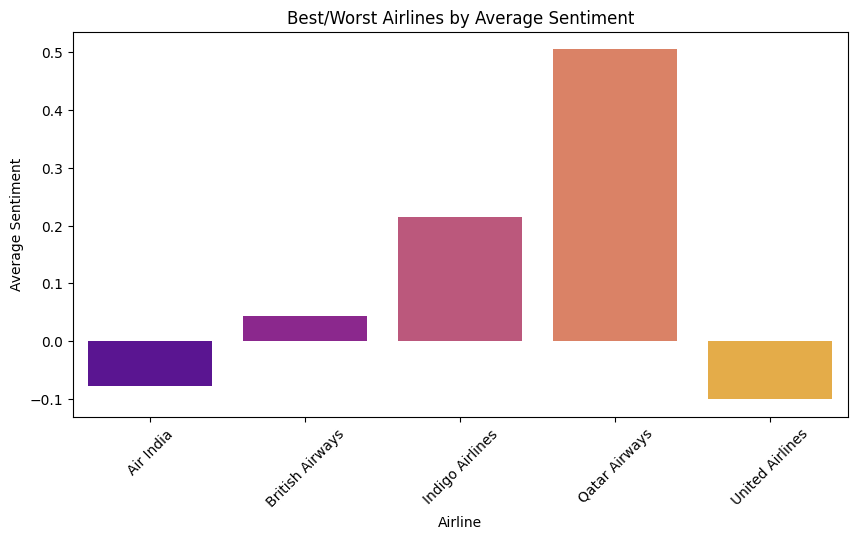

In [9]:
### 4️⃣ Best/Worst Airports by Sentiment ###
location_sentiment = df.groupby("Airline")["Sentiment"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=location_sentiment, x="Airline", y="Sentiment", palette="plasma")
plt.xticks(rotation=45)
plt.title("Best/Worst Airlines by Average Sentiment")
plt.xlabel("Airline")
plt.ylabel("Average Sentiment")
plt.show()

<ipython-input-10-03dfa52116ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x="Flight Class", y="Sentiment", palette="coolwarm")


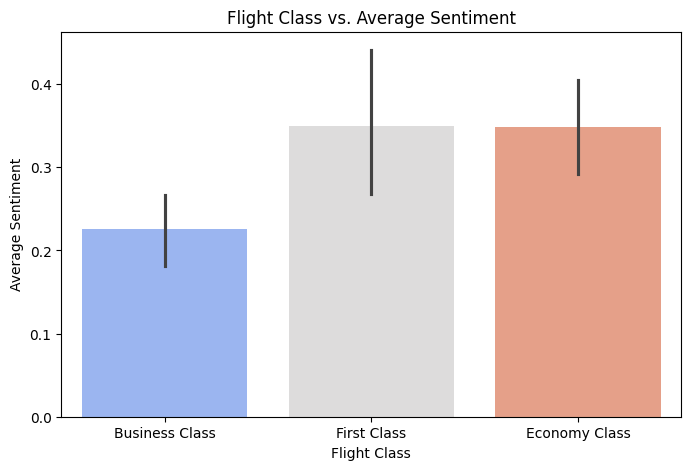

In [10]:
# Plot Flight Class vs. Sentiment
plt.figure(figsize=(8, 5))
sns.barplot(data=df_filtered, x="Flight Class", y="Sentiment", palette="coolwarm")
plt.title("Flight Class vs. Average Sentiment")
plt.xlabel("Flight Class")
plt.ylabel("Average Sentiment")
plt.show()

<ipython-input-11-f150f4633b13>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Seat Issue Mentioned", y="Sentiment", palette="cividis")


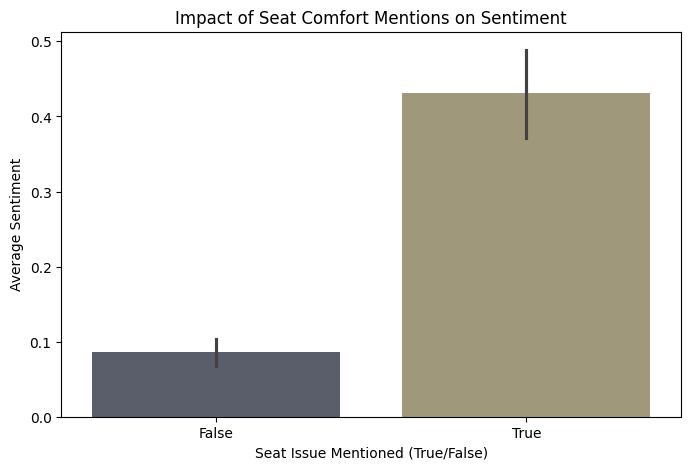

In [11]:
### 5️⃣ Seat Comfort Mentions vs. Sentiment ###
seat_keywords = ["legroom", "seat comfort", "tight space", "cramped", "comfortable seat"]
df["Seat Issue Mentioned"] = df["Review Text"].apply(lambda x: any(word in str(x).lower() for word in seat_keywords))

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Seat Issue Mentioned", y="Sentiment", palette="cividis")
plt.title("Impact of Seat Comfort Mentions on Sentiment")
plt.xlabel("Seat Issue Mentioned (True/False)")
plt.ylabel("Average Sentiment")
plt.show()
